# DS 219 Assignment 5  by Dongkyu Lee (Kevin)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


#### uploading the dataset via url was not working so I uploaded it manually and read it as a pandas dataframe.

In [ ]:
pd.read_csv('winequality-red.csv', sep=';')
data=pd.read_csv('winequality-red.csv', sep=';')

data.dtypes

# print a text file
def print_file(filename):
    with open(filename) as f:
        print(f.read(),end='')
    print("================")

# display data we have read
def show_data(data):
    print(data.dtypes,data,sep='\n—\n')

In [ ]:
#Show the Data Table
filename = "winequality-red.csv"
data = pd.read_csv(filename, sep=";")
print_file(filename)
data

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5
7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5
8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5
8.9;0.62;0.19;3.9;0.17;51;148;0.9986;3.17;0.93;9.2;5
8.5;0.28;

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### In this Data Pipeline, I aim to answer two hypothesis by the end.

1. Alcohol is the biggest indicator for the quality of wines.

2. Density has no relevance to Alcohol Quality.

###### It seems fairly reasonable that alcohol level indicate the quality of the alcohol. The 'liquor' name that is used to categorize stronger alcohol are usually the ones that go for a higher price. I've never seen a case of beer be more expensive than a handle of whiskey. Density is an interesting measure as some cocktails and drinks have unique textures made from combining certain acids and bases but in standard wine, density should not be an indicator on the quality of wine. Are these hypothesis true? I guess we will have to test it out right now.


In [ ]:
# Check Wheteher Data Has Null Values
data[data.isnull().any(axis=1)].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


#### p.s Since the Data are all in numerical values, I will not convert any to numbers.

#### The code below performs a feature importance analysis using a Random Forest Regressor on the dataset. First loading the dataset, spliting it into features and a target variable, and then training a Random Forest model to predict which ingredients dictate the quality of Red wines best. Finally, it generates and displays a bar graph showing the relative importance of each feature in the model, providing a visual representation of which attributes most significantly influence red wine quality predictions.

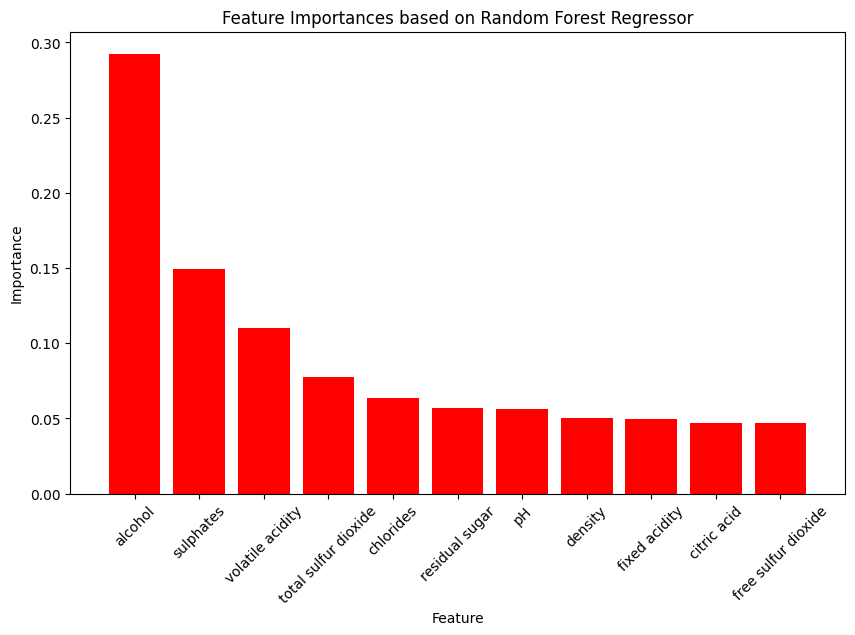

Mean Squared Error: 0.34826229166666667


In [ ]:
X = data.drop("quality", axis=1)
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances based on Random Forest Regressor")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

# MSE
print("Mean Squared Error:", mse)


### Seeing this result was very cool. It proved one of my hypothesis totally wrong and one fairly accurate and I wanted to see what kind of intrepretation my code would generate from the white wine dataset. So I did that too.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [ ]:
pd.read_csv('winequality-white.csv', sep=';')
data=pd.read_csv('winequality-white.csv', sep=';')

# Check Wheteher Data Has Null Values
data[data.isnull().any(axis=1)].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


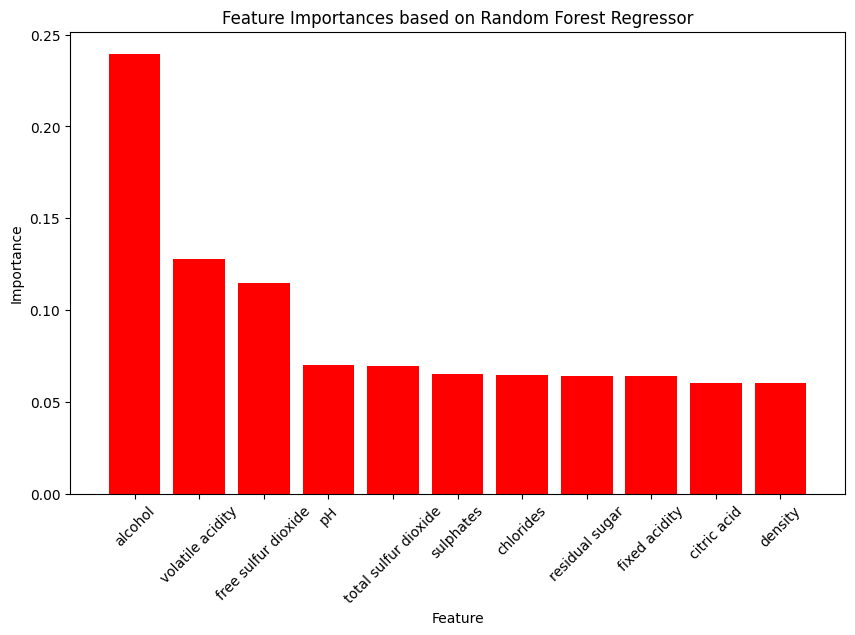

Mean Squared Error: 0.357814693877551


In [ ]:
x = data.drop("quality", axis=1)
Y = data["quality"]

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, Y_train)

Y_pred = model.predict(x_test)
mse = mean_squared_error(Y_test, Y_pred)

# getting and sorting by feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = x.columns

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances based on Random Forest Regressor")
plt.bar(range(x.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, x.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

# MSE
print("Mean Squared Error:", mse)

##### The result was shocking, sulphates wasn't just thrown out of the 2nd most important feature spot, but is all the way at the 6th most important spot. This dataset was about three times bigger than red wine dataset. I'm glad I took the analysis on the other dataset as well.

#### Through these two analysis', we can accept the first hypothesis and reject the second one.

1. Alcohol is the biggest indicator for the quality of wines.

2. Density has no relevance to Alcohol Quality.

#### Thanks for going through this data pipeline with me!